In [2]:
from prophet import Prophet
import pandas as pd

data = pd.read_csv("../data/web_traffic.csv")
# Prepare data for Prophet
forecast_data = data.reset_index()  # Reset index to get Timestamp as a column
forecast_data.rename(columns={"Timestamp": "ds", "TrafficCount": "y"}, inplace=True)

# Display the first few rows
print(forecast_data.head())


   index                   ds      y
0      0  2020-01-20 00:00:00  487.0
1      1  2020-01-20 00:30:00  385.0
2      2  2020-01-20 01:30:00  269.0
3      3  2020-01-20 02:30:00  517.0
4      4  2020-01-20 03:30:00  129.0


In [3]:
# Initialize Prophet model
model = Prophet()

# Fit the model on the prepared data
model.fit(forecast_data)


00:31:21 - cmdstanpy - INFO - Chain [1] start processing
00:31:22 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
# Create a dataframe for future dates (30 days into the future)
future = model.make_future_dataframe(periods=30, freq='D')

# Generate predictions
forecast = model.predict(future)

# Display forecast results
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                      ds          yhat    yhat_lower    yhat_upper
2818 2020-06-12 12:30:00  23561.229747  13636.863106  33234.048892
2819 2020-06-13 12:30:00  14114.037715   5153.189762  23009.906247
2820 2020-06-14 12:30:00  13261.582062   4097.692633  22055.312032
2821 2020-06-15 12:30:00  24671.637132  15231.475062  33137.698891
2822 2020-06-16 12:30:00  24315.371202  15102.194573  32857.958733


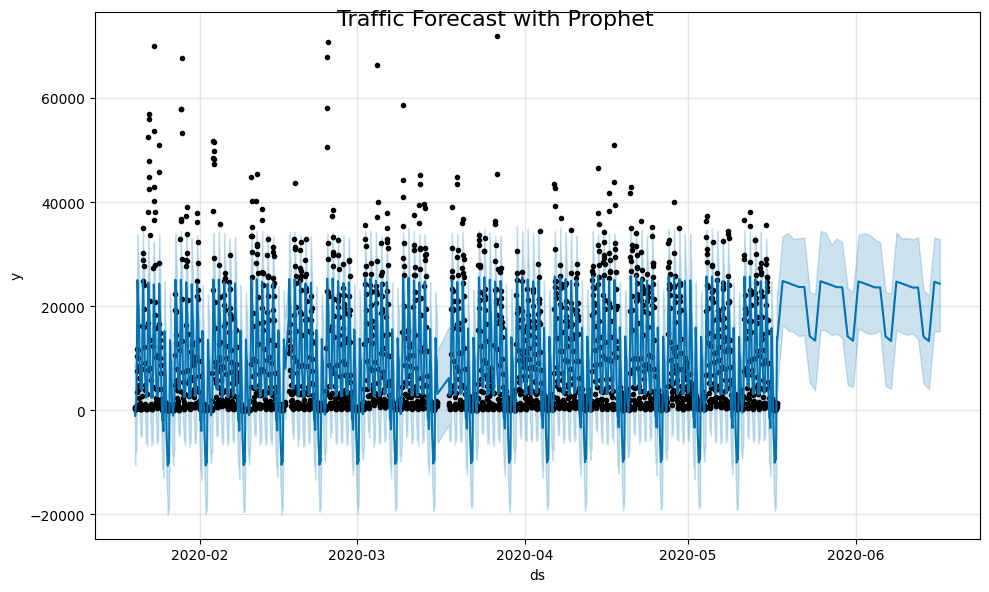

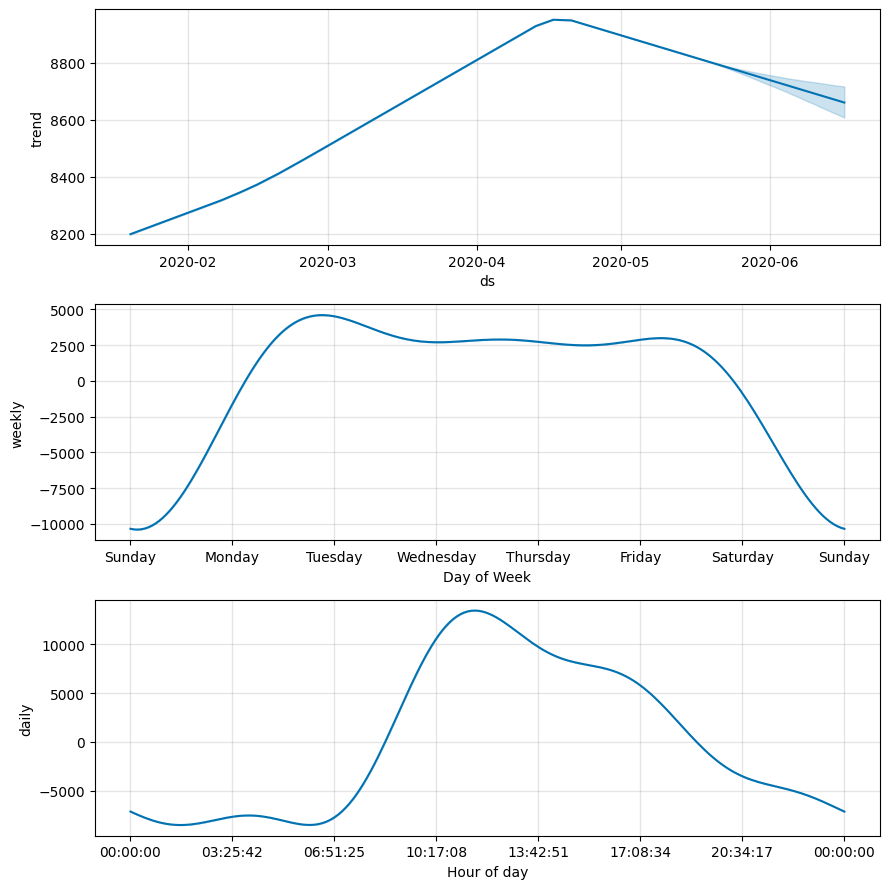

In [5]:
# Plot the forecast
fig = model.plot(forecast)
fig.suptitle("Traffic Forecast with Prophet", fontsize=16)

# Plot components (trend and seasonality)
fig_components = model.plot_components(forecast)



### Forecast Trend:

- The overall trend shows an increase in web traffic until around April 2020, after which there is a slight decline.
- The future forecast suggests a consistent cyclic pattern with some degree of uncertainty, as represented by the shaded confidence interval.

## Seasonality Insights:

### Weekly Pattern:
- Web traffic is highest on Mondays and gradually decreases throughout the week.
- Saturdays and Sundays see the lowest activity, possibly indicating reduced user engagement over weekends.

### Daily Pattern:
- Traffic peaks during the late morning and early afternoon (around 10:00 to 14:00), likely reflecting increased user activity during work hours.
- Traffic declines steadily after 17:00, with the lowest activity occurring during the late night hours.

### Traffic Volatility:

- The historical data shows significant fluctuations in traffic counts, indicating periods of very high traffic interspersed with low activity.
- The confidence intervals for the forecast also suggest variability but within a predictable range.

In [9]:
import boto3

# Save forecast to a CSV file
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("../data/forecast_results.csv", index=False)

# Upload the forecast file to S3
bucket_name = "web-traffic-data-bucket"
s3 = boto3.client('s3')
s3.upload_file("../data/forecast_results.csv", bucket_name, "forecast_results.csv")

print("Forecast results saved and uploaded to S3!")


Forecast results saved and uploaded to S3!
